<img
src="http://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>

<p><font size="5"> Cursus Recherche : Module Analogie </font></p>
<p><font size="5"> Representation Learning </font></p>
</br>
<p><font size="4"> [<span style="color:blue">Institut Mines Télécom</span>](https://www.mines-telecom.fr/en/)</p>

</CENTER>

----------------------------

# <span style="color:##00B8DE"> Pipeline : from reduction to clustering</span>

**1)** With OliFaces


**2)** With Digits


**3)** With Haxby

**1)** With OliFaces

(400, 2)


AttributeError: 'MeanShift' object has no attribute 'labels_'

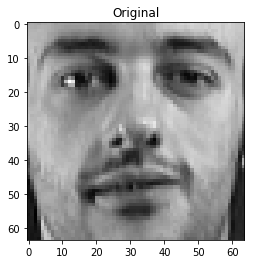

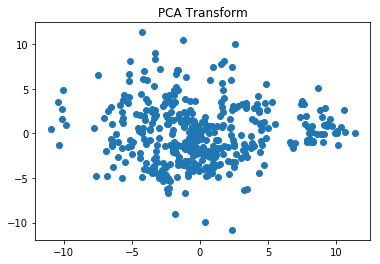

In [11]:
# We will Test ICA Transform on OliFaces

%matplotlib inline

import sklearn.datasets as skld
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, cluster

#ICA
from sklearn.decomposition import PCA

#We generate our samples
OliFaces = skld.fetch_olivetti_faces()
Target = np.array(OliFaces.target)

# We create an object from the PCA class
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

ImageOliPCA = pca.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
print(np.shape(ImageOliPCA))

plt.figure()
plt.title("Original")
plt.imshow(OliFaces.images[150], cmap=plt.cm.gray)

plt.figure()
plt.title("PCA Transform")
plt.scatter(ImageOliPCA[:,0],ImageOliPCA[:,1])

#Cluster : Bandwith with MeanShift
bandwidth = cluster.estimate_bandwidth(ImageOliPCA)

ms = MeanShift(bandwidth=bandwidth, seeds = ImageOliPCA, bin_seeding=True)

labelsPCA = ms.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob


plt.figure()
plt.title("Data colored by k-means After PCA Transform")
plt.scatter(ImageOliPCA[:,0],ImageOliPCA[:,1],c=labelsPCA)

print("Clustering performance evaluation for PCA/kmeans on Olifaces: ")
print(metrics.adjusted_rand_score(Target, labelsPCA))


In [12]:
MeanShift?

In [ ]:

# We will Test ICA Transform on OliFaces
# We create an object from the ICA class
ica = FastICA(n_components=2, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)

ImageOliICA = ica.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
print(np.shape(ImageOliICA))

plt.figure()
plt.title("ICA Transform")
plt.scatter(ImageOliICA[:,0],ImageOliICA[:,1])

#Clusterisation ICA:
nbClust = 10

kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageOliICA)
labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
predictionICA = kmeans.predict([[0,0],[4,4]])

plt.figure()
plt.title("Data colored by k-means After ICA Reduction")
plt.scatter(ImageOliICA[:,0],ImageOliICA[:,1],c=labelsICA)

print("Clustering performance evaluation for ICA/kmeans on Olifaces: ")
print(metrics.adjusted_rand_score(Target, labelsICA))

**2)** With Digits

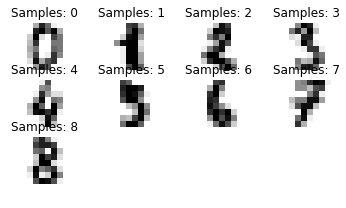

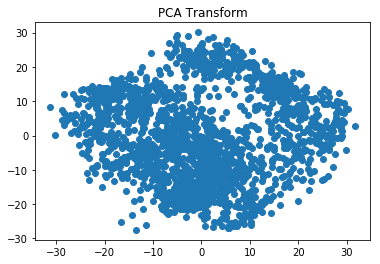

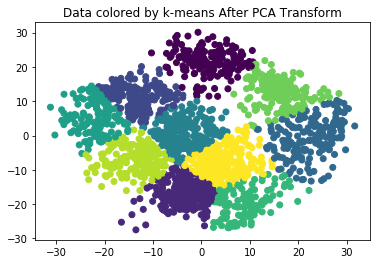

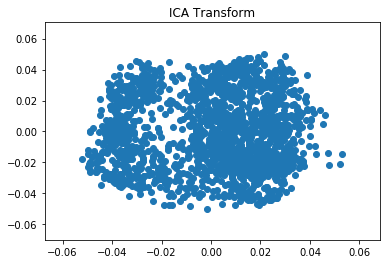

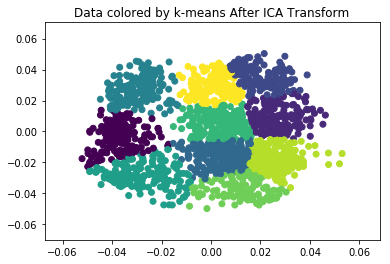

Clustering performance evaluation for ICA/kmeans on Digits: 
0.387337324775
Clustering performance evaluation for PCA/Kmeans on Digits : 
0.395950262144


In [73]:
# We will Test PCA Transform on Digits

%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#ICA
from sklearn.decomposition import PCA

# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(4, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Samples: %i' % label)
plt.show()
#PCA
n_samples = len(digits.images)
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
ImageDigitsPCA = pca.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data

plt.figure()
plt.title("PCA Transform")
plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1])
plt.show()

#ClusterisationPCA:
nbClust = 10
kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsPCA)
labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
prediction = kmeans.predict([[0,0],[4,4]])

plt.figure()
plt.title("Data colored by k-means After PCA Transform")
plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1],c=labelsPCA)
plt.show()

#ICA

ica = FastICA(n_components=2, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
ImageDigitsICA = ica.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data

plt.figure()
plt.title("ICA Transform")
plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1])
plt.show()

#Clusterisation ICA:
nbClust = 10
kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsICA)
labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
predictionICA = kmeans.predict([[0,0],[4,4]])

plt.figure()
plt.title("Data colored by k-means After ICA Transform")
plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1],c=labelsICA)
plt.show()

print("Clustering performance evaluation for ICA/kmeans on Digits: ")
print(metrics.adjusted_rand_score(digits.target, labelsICA))

print("Clustering performance evaluation for PCA/Kmeans on Digits : ")
print(metrics.adjusted_rand_score(digits.target, labelsPCA))

**3)** With Haxby

In [1]:
# import Data Set !
from nilearn import datasets
import numpy as np
# By default 2nd subject from haxby datasets will be fetched.
haxby_dataset = datasets.fetch_haxby()

# Print basic information on the dataset
print('Mask nifti images are located at: %s' % haxby_dataset.mask)
print('Functional nifti images are located at: %s' % haxby_dataset.func[0])

func_filename = haxby_dataset.func[0]
mask_filename = haxby_dataset.mask

# Load the behavioral data that we will predict
labels = np.recfromcsv(haxby_dataset.session_target[0], delimiter=" ")
y = labels['labels']
session = labels['chunks']

# Remove the rest condition, it is not very interesting
non_rest = y != b'rest'
y = y[non_rest]

# Get the labels of the numerical conditions represented by the vector y
unique_conditions, order = np.unique(y, return_index=True)
# Sort the conditions by the order of appearance
unique_conditions = unique_conditions[np.argsort(order)]

#Pouyr pca ica, faire des tests de nbres de components de 1 à 10(boucle for), qui donne % de réussite (plus c'est proche de 1, mieux c'est) et 3 images. 


Dataset created in C:\Users\loic/nilearn_data\haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (15 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (520 seconds, 8 min)
Extracting data from C:\Users\loic/nilearn_data\haxby2001\c2acb32a0dc9f8cb769ce50ba7dbd1b4\subj2-2010.01.14.tar.gz..... done.


Mask nifti images are located at: C:\Users\loic/nilearn_data\haxby2001\mask.nii.gz
Functional nifti images are located at: C:\Users\loic/nilearn_data\haxby2001\subj2\bold.nii.gz


In [2]:
from nilearn.input_data import NiftiMasker
# For decoding, standardizing is often very important
nifti_masker = NiftiMasker(mask_img=mask_filename, standardize=True,
                           sessions=session, smoothing_fwhm=4,
                           memory="nilearn_cache", memory_level=1)
X = nifti_masker.fit_transform(func_filename)

# Remove the "rest" condition
X = X[non_rest]
session = session[non_rest]

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\nilearn\input_data\nifti_masker.py:293: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  copy=copy
